# **Project 1 - Part 1 (Core)**
- Author: Yazan Yousef

## Project Overview

## Load and Inspect Data


## Clean Data

## Exploratory Data Analysis

## Feature Inspection

# **Project 1 - Part 2 (Core)**

## Data Dictionary

| Variable Name          | Description                                                                               |
|------------------------|-------------------------------------------------------------------------------------------|
| Item_Identifier        | Product ID                                                                                |
| Item_Weight            | Weight of product                                                                         |
| Item_Fat_Content       | Whether the product is low-fat or regular                                                |
| Item_Visibility        | The percentage of total display area of all products in a store allocated to the product  |
| Item_Type              | The category to which the product belongs                                                |
| Item_MRP               | Maximum Retail Price (list price) of the product                                          |
| Outlet_Identifier      | Store ID                                                                                  |
| Outlet_Establishment_Year | The year in which the store was established                                            |
| Outlet_Size            | The size of the store in terms of ground area covered                                     |
| Outlet_Location_Type   | The type of area in which the store is located                                            |
| Outlet_Type            | Whether the outlet is a grocery store or some sort of supermarket                         |
| Item_Outlet_Sales      | Sales of the product in the particular store. This is the target variable to be predicted. |


## Imports

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mounted drive



In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [141]:
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df_original = df.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data cleaning

> How many rows/columns:




In [143]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns

 Checking the data types:

In [144]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Also, the salary column is showing as an object type column and should be either a float64 or an int64 type column.

All other data types are as they should be.

## Dropping unwanted column

In [145]:
## if you want to drop some specific columns use this code below
# df.drop(columns = 'name of column', axis = 1, inplace = True)
# df.info()

## Duplicated Data


In [146]:
df.duplicated().sum()

0

In [147]:
# Dropinh duplicates
df = df.drop_duplicates()

In [148]:
df.duplicated().sum()

0

## Missing Values

In [149]:
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- In order to make informed decisions about how to handle missing data, we will do some additional EDA

- Identifying % of missing data (optional)

In [150]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## Inspecting Experience Level:

In [151]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster']);

<ipython-input-151-56e862ec7b1c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster']);
<ipython-input-151-56e862ec7b1c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster']);


In [152]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

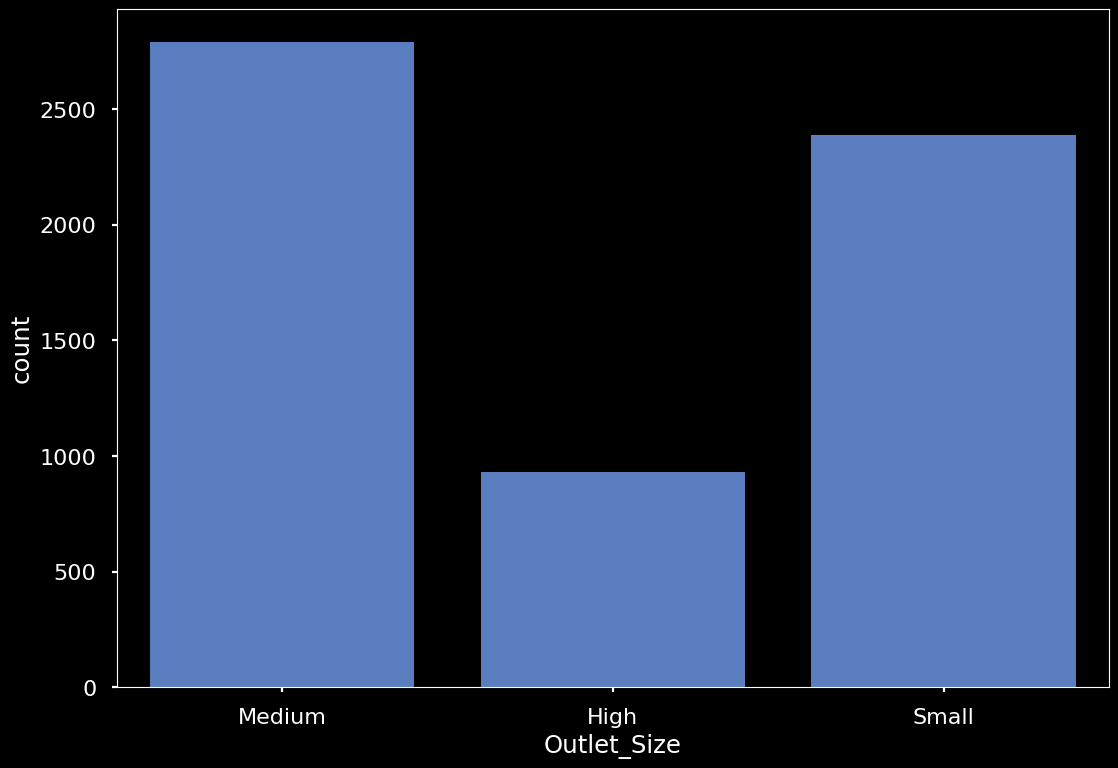

In [153]:
ax = sns.countplot(data = df, x = 'Outlet_Size');

- Strategy #1: To deal with the missing values, we could simply drop the missing values.

- Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.

- Strategy #3: To deal with the missing values, we could fill them in with the word Unknown for this feature.

- We will select Strategy #3

In [154]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')


In [155]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium     2793
Unknown    2410
Small      2388
High        932
Name: count, dtype: int64

In [156]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Checking to make sure the values for the Outlet_Size column were filled in.

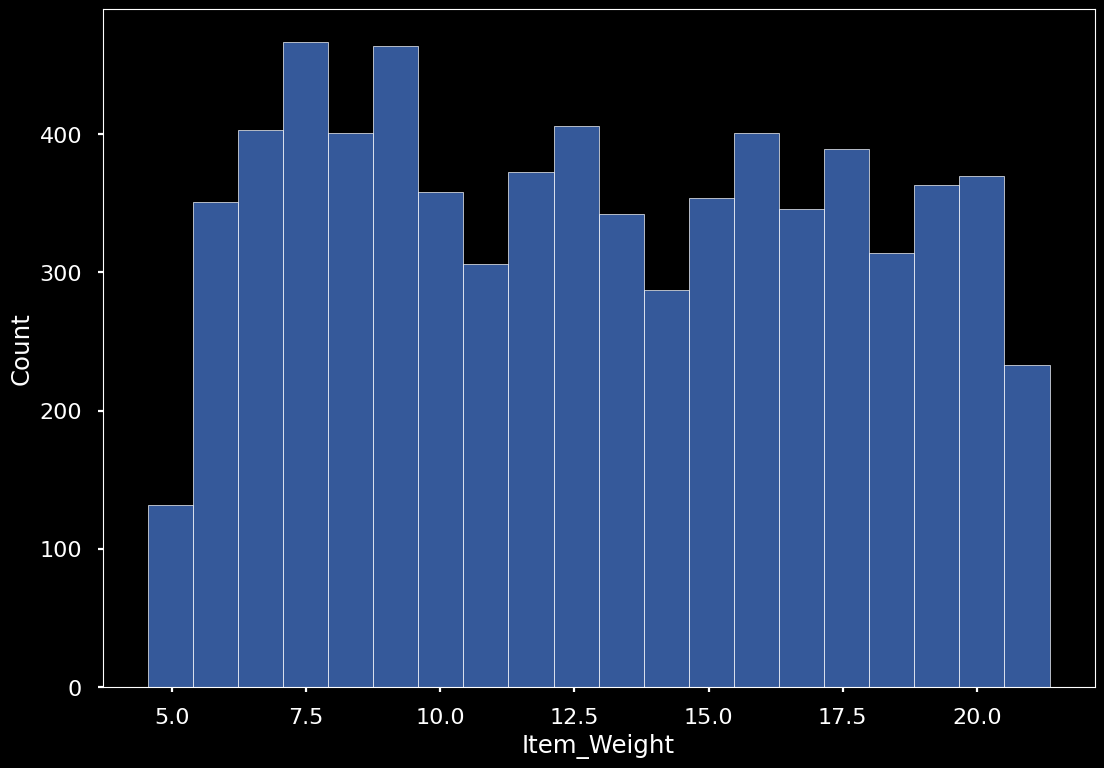

In [157]:
ax = sns.histplot(data = df, x = 'Item_Weight')

- This histogram shows that the majority of the salaries are around $100,000.

- Strategy #1: To deal with the missing values, we could simply drop the missing values.
- Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.
- Strategy #3: To deal with the missing values, we could fill them in with the median/mean value for this feature.
- To maintain as much data as possible, we will not drop the data. So we will - choose either Strategy #2 or Strategy #3. To make this choice we will do a bit more investigating.

In [158]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


- Filling in the Item_Weight column with the median value.

In [159]:
median_value = df['Item_Weight'].median()
df['Item_Weight'] = df['Item_Weight'].fillna(median_value)

- Checking to make sure the values for the Item_Weight column were filled in.

In [160]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Fixing Data Types

In [161]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Inspecting Categorical Columns & Addressing Inconsistent Values


- We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.

In [162]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [163]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64



- Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64



- Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64



- Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT

In [164]:
# All columns have appropiate distinct values , except for Item_Fat_content

replace_dict = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replace_dict)

In [165]:
# Check again after normalization
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [166]:
# Check again after normalization
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Summary Statistics for Numeric Features


- We will now view use df.describe() to view the summary statistics for the numeric features.

In [167]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- Here is another method to look at just the mean, min, and max for each numeric column.

In [168]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


- Here is another method to look at just the mean, min, and max for each numeric column.

In [169]:
# Getting min, max and mean for numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_columns = numerical_df.columns

for num_col in numerical_columns:
  print (f"{num_col} minimum = {numerical_df[num_col].min()}")
  print (f"{num_col} maximum = {numerical_df[num_col].max()}")
  print (f"{num_col} mean = {numerical_df[num_col].mean()}")

Item_Weight minimum = 4.555
Item_Weight maximum = 21.35
Item_Weight mean = 12.81341957057374
Item_Visibility minimum = 0.0
Item_Visibility maximum = 0.328390948
Item_Visibility mean = 0.06613202877895108
Item_MRP minimum = 31.29
Item_MRP maximum = 266.8884
Item_MRP mean = 140.9927819781767
Outlet_Establishment_Year minimum = 1985
Outlet_Establishment_Year maximum = 2009
Outlet_Establishment_Year mean = 1997.8318667135984
Item_Outlet_Sales minimum = 33.29
Item_Outlet_Sales maximum = 13086.9648
Item_Outlet_Sales mean = 2181.288913575032


In [170]:
## incase to change any value use this code
#Column_Number = df['Column_Number'] == 'Value'
#df[Column_Number]

# **Project 1 - Part 3 (Core)**

## Imports & Cleaning

In [171]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [175]:
# Dropinh duplicates
df = df.drop_duplicates()

In [176]:
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [177]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [178]:
df['Item_Weight'] = df['Item_Weight'].fillna(0.00)

In [179]:
df["Outlet_Size"] = df["Outlet_Size"].fillna('No Size')

In [180]:
# Missing value count after filling missing values
missing_count = df.isna().sum()
print(missing_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [181]:
'''
  Categorical volumns to probably fix
  Item_Fat_Content
  Item_Type
  Outlet_Location_Type
  Outlet_Type
'''
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Location_Type", "Outlet_Type"]

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df[col].unique())
  print ("\n\n")

Distinct values for Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



Distinct values for Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



Distinct values for Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']



Distinct values for Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





In [182]:
# All columns have appropiate distinct values , except for Item_Fat_content

replace_dict = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replace_dict)

In [183]:
# Check again after normalization
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [184]:
df["Outlet_Size"]

0        Medium
1        Medium
2        Medium
3       No Size
4          High
         ...   
8518       High
8519    No Size
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [185]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [186]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.52,-0.05
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.52,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.05,-0.13,0.57,-0.05,1.00


## EDA Using Loops

In [187]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [188]:
df['Item_Weight'].value_counts()

Item_Weight
0.000     1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: count, Length: 416, dtype: int64

In [189]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

- Edited for loop EDA


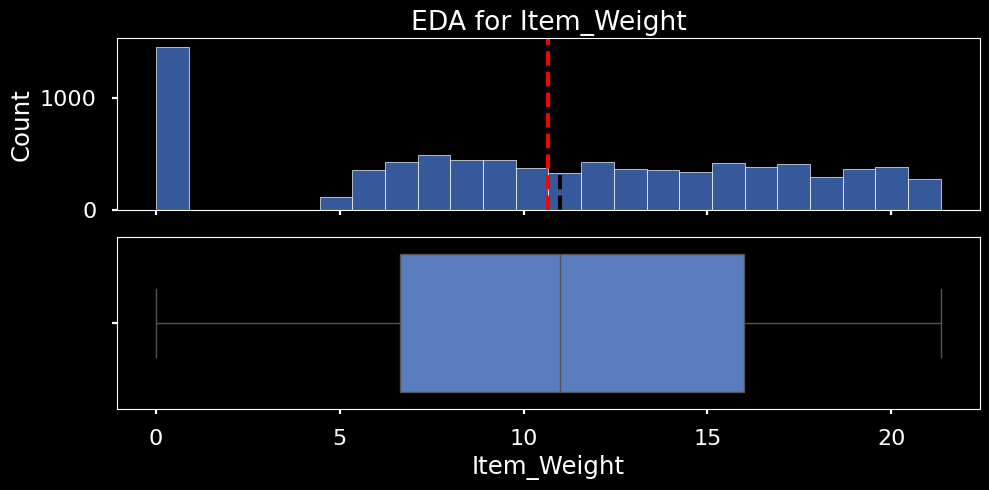

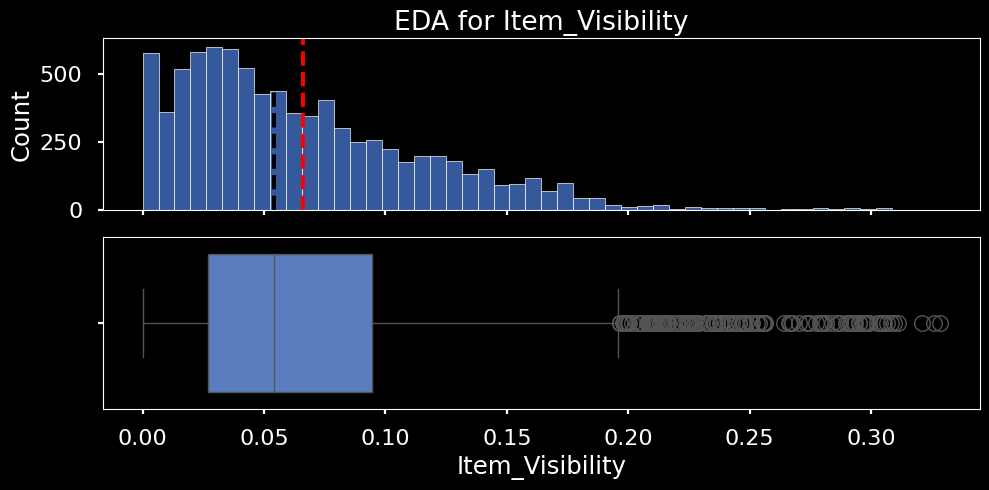

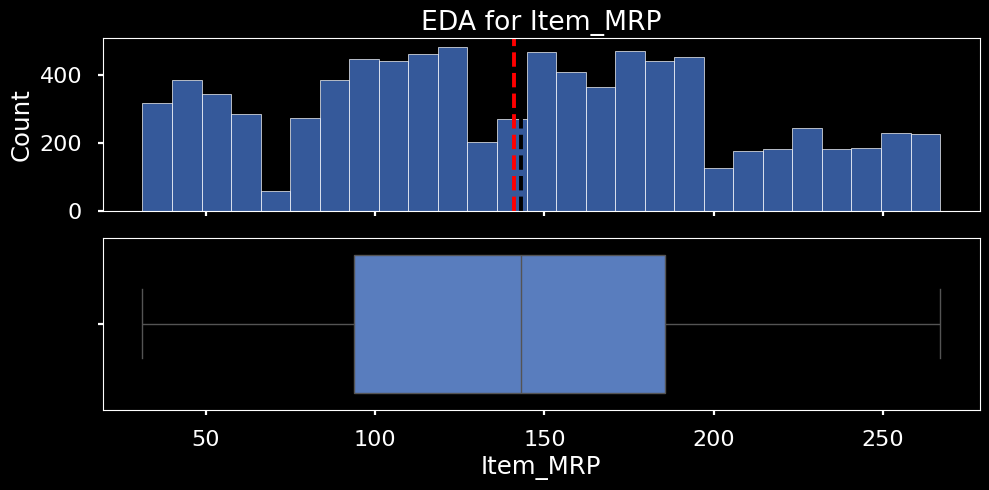

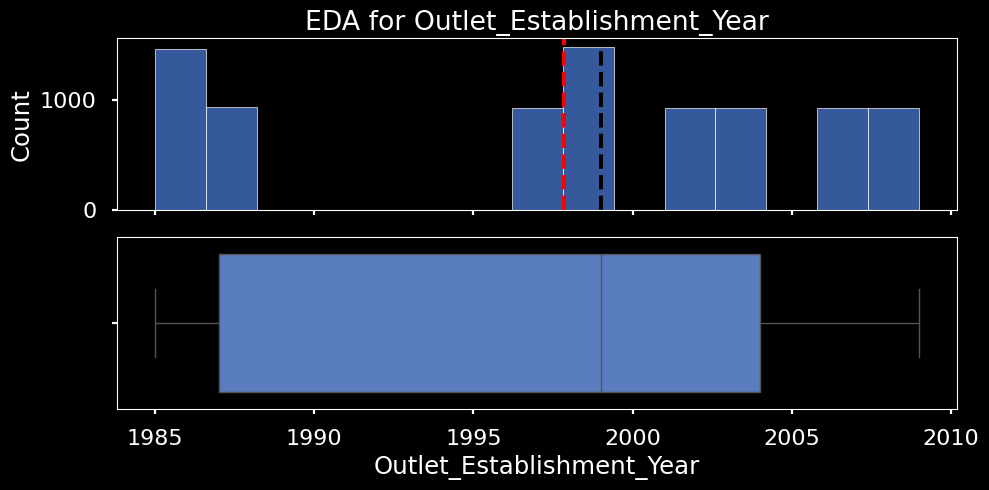

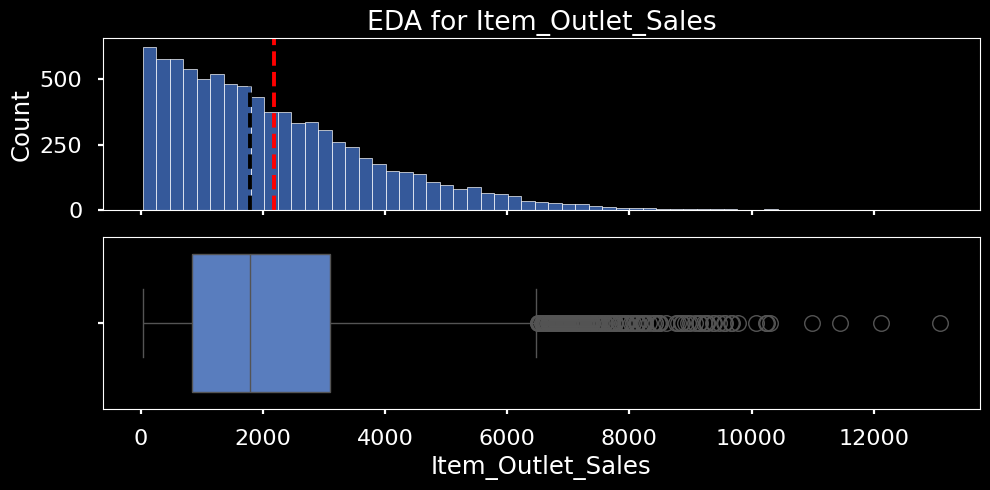

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric(df):
    """EDA function to plot histograms and boxplots for numeric columns"""
    # Extract numeric columns from the DataFrame
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Iterate through numeric columns
    for col in num_cols:
        # Create subplots
        fig, axes = plt.subplots(nrows=2, figsize=(10, 5), sharex=True)

        # Histogram plot
        sns.histplot(data=df, x=col, ax=axes[0])
        mean_value = df[col].mean()
        axes[0].axvline(mean_value, color='red', ls='--', label=f"Mean Value = ${mean_value:,.2f}")
        med_value = df[col].median()
        axes[0].axvline(med_value, color='black', ls='--', label=f"Median Value = ${med_value:,.2f}")

        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[1])

        # Set title
        axes[0].set_title(f'EDA for {col}')

        # Fix overlapping labels
        plt.tight_layout()
        plt.show()

# Call the function with your DataFrame
plot_numeric(df)


## Visualizing with Barplots

In [191]:
str_cols = df.select_dtypes('object').columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [192]:
df[str_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [193]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [194]:
val_counts = df['Item_Fat_Content'].value_counts()
val_counts

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

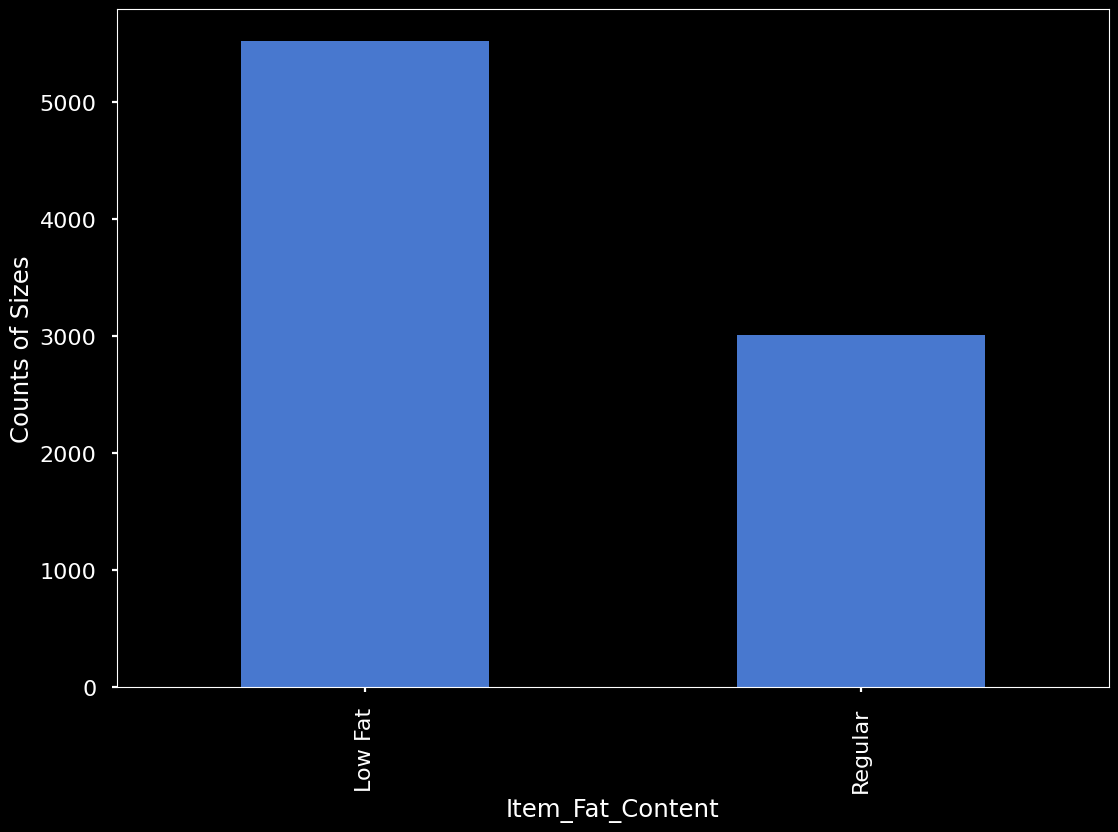

In [195]:
ax = val_counts.plot(kind='bar')
ax.set_ylabel('Counts of Sizes')
ax.set_xlabel('Item_Fat_Content');

- make a four loop function

KeyboardInterrupt: 

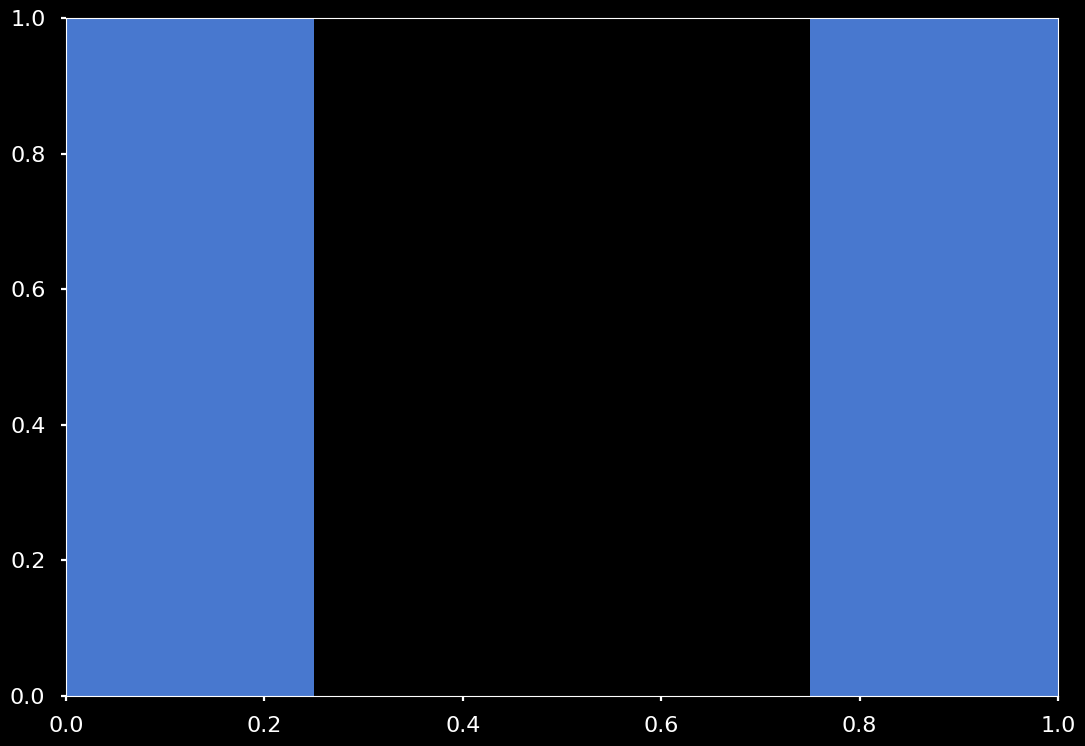

In [196]:
import matplotlib.pyplot as plt

# Iterate over each column and plot bar chart
for column in str_cols:
    # Get value counts
    val_counts = df[column].value_counts()

    # Plot bar chart
    ax = val_counts.plot(kind='bar')

    # Set labels
    ax.set_ylabel('Counts of Sizes')
    ax.set_xlabel(column)

    # Show plot
    plt.show()


In [ ]:
sns.heatmap(corr, cmap='Greens', annot = True);

In [ ]:
df[str_cols].nunique()

# **Project 1 - Part 4 (Core)**

## Importing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_original.info()
df_original.head()

## EDA Functions

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



  # TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=temp_df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=temp_df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_original.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df_original[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Inspecting Each Feature

### Define your target column:
Item_Outlet_Sales

### Item_Identifier

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df_original[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 1559 unique categories.
  - Yes Very High (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Item_Identifier', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 No
### Does this feature appear to be a predictor of the target?
 No

### Item_Weight


In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_original[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


In [ ]:
plot_numeric_vs_target(df_original, 'Item_Weight', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?

### Does this feature appear to be a predictor of the target?


### Item_Fat_Content

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_original[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Item_Fat_Content', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Visibility

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


In [ ]:
plot_numeric_vs_target(df_original, 'Item_Visibility', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Item_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_MRP

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


In [ ]:
plot_numeric_vs_target(df_original, 'Item_MRP', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Identifier

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Outlet_Identifier', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Establishment_Year

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


In [ ]:
plot_numeric_vs_target(df_original, 'Outlet_Establishment_Year', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Size

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  -  high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Outlet_Size', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Location_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype



In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Outlet_Location_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Outlet_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype



In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
plot_categorical_vs_target(df_original, 'Outlet_Type', 'Item_Outlet_Sales');

### Based on your business understanding, would you expect this feature to be a - predictor of the target?
 Yes
### Does this feature appear to be a predictor of the target?
 Yes

### Item_Outlet_Sales (target)

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype



In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_original,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



# **Project 1 - Part 5 (Core)**


## Preprocesing for Machine Learning


### Imports

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Load Data

In [ ]:

fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023 (1).csv'
df2 = pd.read_csv(fpath)
#df = df.set_index("")
df2.info()
df2.head()

### Dictionary

| Variable Name            | Description                                                  |
|--------------------------|--------------------------------------------------------------|
| Item_Identifier          | Unique product ID                                            |
| Item_Weight              | Weight of product                                            |
| Item_Fat_Content         | Whether the product is low fat or regular                   |
| Item_Visibility          | The percentage of total display area of all products        |
|                          | in a store allocated to the particular product               |
| Item_Type                | The category to which the product belongs                    |
| Item_MRP                 | Maximum Retail Price (list price) of the product            |
| Outlet_Identifier        | Unique store ID                                              |
| Outlet_Establishment_Year| The year in which store was established                     |
| Outlet_Size              | The size of the store in terms of ground area covered        |
| Outlet_Location_Type     | The type of area in which the store is located               |
| Outlet_Type              | Whether the outlet is a grocery store or supermarket         |
| Item_Outlet_Sales        | Sales of the product in the particular store                 |
|                          | This is the target variable to be predicted                  |


In [ ]:
df2 = df2.drop(columns=['Item_Identifier'])
df2.info()

In [ ]:
missing_count = df2.isna().sum()
missing_count

In [ ]:
df2['Item_Weight']

In [ ]:
df2['Item_Weight'] = df2['Item_Weight'].fillna(0.00)

In [ ]:
df2["Outlet_Size"]

In [ ]:
df2["Outlet_Size"] = df2["Outlet_Size"].fillna('No Size')

In [ ]:
df2.duplicated().sum()

In [ ]:
missing_count = df2.isna().sum()
missing_count

In [ ]:
categorical_columns = df2.select_dtypes('object').columns

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df2[col].unique())
  print ("\n\n")

In [ ]:
replace_dict = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace(replace_dict)

In [ ]:
# Check again after normalization
df2['Item_Fat_Content'].unique()

In [ ]:
categorical_columns = df2.select_dtypes('object').columns

for col in categorical_columns:
  print (f"Distinct values for {col}")
  print(df2[col].unique())
  print ("\n\n")

In [ ]:
df2.describe()

In [ ]:
numeric_columns = df2.select_dtypes('number').columns

for col in numeric_columns:
  impossible_values = df2[(df2[col] < 0)]

  if not impossible_values.empty:
        print("Impossible numeric values found in column '{}':".format(col))
        print(impossible_values)
        print("\nImpossible numeric values fixed.")

  else:
        print("No impossible numeric values found in column '{}'.".format(col))
  print (f"Distinct values for {col}")
  #print(df[col].unique())
  print ("\n\n")


In [ ]:
# Define features and target
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

In [ ]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Item_Fat_Content', 'Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order_1 = ['Low Fat','Regular']
qual_cond_order_2 = ['Medium', 'No Size', 'High', 'Small']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order_1, qual_cond_order_2]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)

In [ ]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [ ]:
# Showing X_train and y_train
display(X_train.head(5), y_train.head(5))



# **Project 1 - Part 6(Core)**

### build a linear regression model to predict sales.

#### Imports for Machine Learning


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Build a linear regression model.

In [ ]:
# Create the preprocessing ColumnTransformer
preprocessor = ColumnTransformer([ohe_tuple, num_tuple, ord_tuple],
                                 verbose_feature_names_out=False)
preprocessor



### Linear Regression Model


In [ ]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe


In [ ]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

- Use the custom evaluation function to get the metrics for your model (on training and test data).

In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df1 = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [ ]:
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)



> what extent is this model overfit/underfit?

- the model seems to be neither significantly overfit nor underfit <br> It's performing similarly on both training and test data

### Build a default Random Forest model.

- Importing

In [ ]:
from sklearn.ensemble import RandomForestRegressor

- Train Default Model (Using a model pipeline)

In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)



In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)



> Given these observations, the model is likely overfitting the training data.

> Compare this model's performance to the linear regression model: which model has the best test scores?


- linear regression has slightly better performance compared to random forest across most metrics.

## GRIDCV

In [ ]:
# Looking at options for tuning this model
rf_pipe.get_params()


In [ ]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Instantiate GridSearchCV with no cross-validation folds
grid_search = GridSearchCV(rf_pipe, param_grid, n_jobs=-1, verbose=1, cv=2)

# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Obtain the best combination directly
grid_search.best_params_


In [ ]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_


In [ ]:
# Use custom function to evalute the model
evaluate_regression( best_model, X_train, y_train, X_test, y_test)



> Compare your tuned model to your default Random Forest: did the performance improve?

- Overall, the tuned model outperforms the default Random Forest model across all metrics on the test data<br>It has lower errors (MAE, MSE, RMSE) and higher R^2<br>suggesting better predictive performance. Therefore, the tuned model is preferred for making predictions on unseen data.







## Overall Recommendation


> Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
<br>
<br>
- According to the tuned model where the R^2 = 0.602
<br>
<br>
This means that our model explains approximately 60.2% of the variability in the sales of our products. In other words, about 60.2% of the fluctuations in sales can be attributed to the factors considered in our model,
<br>
<br>
> Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
<br>
<br>
- The MAE of the tuned random forest model (729.779) is lower than both the linear regression model (803.864) and the default random forest model (767.008) on the test data.
<br>
<br>
- The MSE of the tuned random forest model (1,098,257.195) is lower than both the linear regression model (1,194,162.902) and the default random forest model (1,217,868.428) on the test data.
<br>
<br>
- The RMSE of the tuned random forest model (1,047.978) is lower than both the linear regression model (1,092.778) and the default random forest model (1,103.571) on the test data.
<br>
<br>
<br>



- Overall, based on the provided metrics, the tuned random forest model performs the best among the three models on the test data, having lower errors (MAE, MSE, RMSE) and higher R^2, suggesting better predictive performance.

# Project 1 - Part 8 (core)

## Imports

In [197]:
## Our standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

In [198]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

## Load Data

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# Load in the student performance - portuguese dataset & display the head and info
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [236]:
y = df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,FDI60,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,Tier 3,Grocery Store
7604,DRD25,6.135,LF,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,NCP18,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,NCS30,5.945,LF,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,FDI08,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


## Preprocessing

In [240]:
# select numeric cols
cat_cols = make_column_selector(dtype_include='object')

# make numeric pipeline
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
# cat_tuple
cat_tuple = ('categorical', cat_pipe, cat_cols)

# select numeric cols
num_cols = make_column_selector(dtype_include='number')

# make numeric pipeline
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

# numeric tuple
num_tuple =('numeric', num_pipe, num_cols)

# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out=False)
preprocessor


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d2ebee510c0>),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d2ebee51fc0>)],
                  verbose_feature_names_out=False)

In [241]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)
X_test_tf.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,Item_Identifier_DRF23,Item_Identifier_DRF25,Item_Identifier_DRF27,Item_Identifier_DRF36,Item_Identifier_DRF37,...,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,15.25,0.061531,132.2968,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,17.85,0.044463,127.1020,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,7.27,0.071078,114.2518,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## LinearRegression

In [242]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_tf,y_train)
evaluate_regression(lin_reg, X_train_tf, y_train, X_test_tf,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 725.460
- MSE = 946,818.400
- RMSE = 973.046
- R^2 = 0.668

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 3,269,712,334.701
- MSE = 2,120,363,638,725,428,117,504.000
- RMSE = 46,047,406,427.783
- R^2 = -687,364,670,427,628.125


In [243]:
coeffs = pd.Series(lin_reg.coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs.head(3)

Item_Weight         -2.522053
Item_Visibility   -788.209209
Item_MRP           -11.282743
Name: Coefficients, dtype: float64

In [244]:
## rank the coeffs and select the top_n
top_n=3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n)
coeffs_plot = coeffs.loc[top_n_features.index].sort_values()
coeffs_plot

intercept             -5.545964e+14
Outlet_Size_Small     -4.025442e+13
Outlet_Size_MISSING   -2.214039e+13
Name: Coefficients, dtype: float64

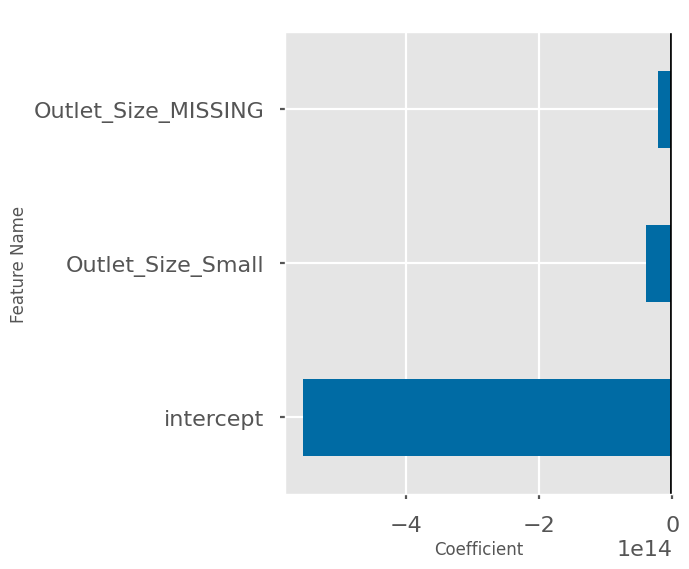

In [245]:
## sort features and keep top_n and set title
ax = coeffs_plot.sort_values().plot(kind='barh',figsize=(5,6))
ax.axvline(0,color='k');
ax.set(title = f"Top {top_n} Largest Coefficients",ylabel="Feature Name",
      xlabel='Coefficient');

In [246]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False,
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

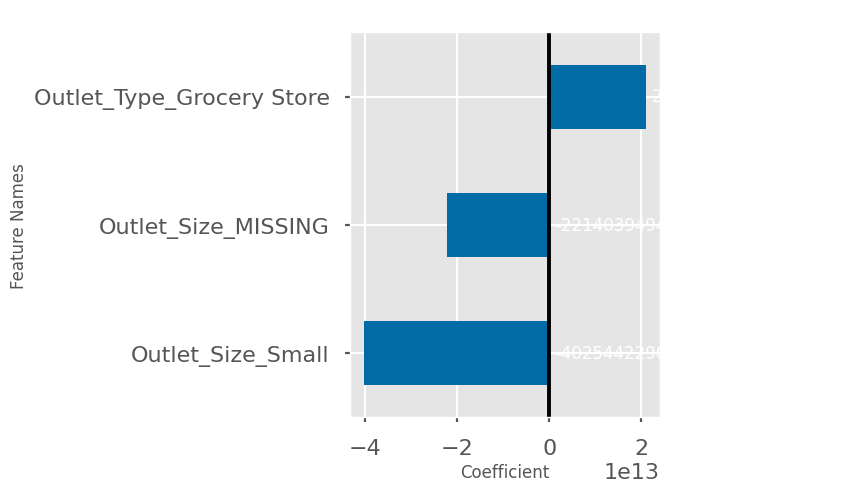

In [247]:
plot_coeffs(coeffs,top_n=3,intercept=False,annotate=True);

- The 3 largest coefficients are for:
    - enginetype_rotor
    - fueltype_diesel
    - fuelsystem_idi

## Tree-Based Model

In [248]:
rf_reg = RandomForestRegressor(random_state = SEED)
rf_reg.fit(X_train_tf,y_train)
evaluate_regression(rf_reg, X_train_tf, y_train, X_test_tf,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 292.380
- MSE = 178,402.162
- RMSE = 422.377
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 820.228
- MSE = 1,352,868.046
- RMSE = 1,163.129
- R^2 = 0.561


In [249]:
feature_importance = pd.Series(rf_reg.feature_importances_, index=feature_names,
                        name='RF Feature Importances')
feature_importance.head()

Item_Weight                  0.029925
Item_Visibility              0.056909
Item_MRP                     0.403024
Outlet_Establishment_Year    0.026872
Item_Identifier_DRA12        0.000056
Name: RF Feature Importances, dtype: float64

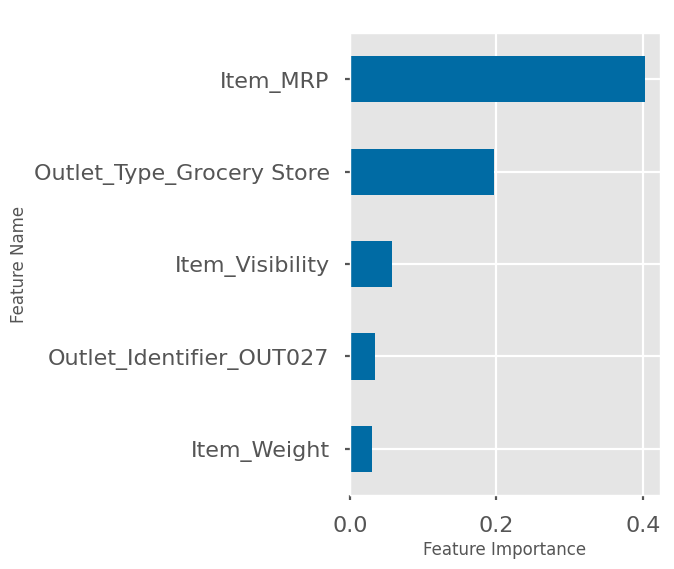

In [250]:
ax = feature_importance.sort_values().tail(5).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');